# Solutions of equations in one variable

# The Bisection Method

In [1]:
using DataFrames, Plots

In [2]:
# Define the Bisection Method function, allowing any function `f` to be passed in
function bisection_method(f, a, b; tolerance=10^-2, max_iterations=100)
    # Start the timer
    start_time = time()
    
    # DataFrame to store results of each iteration
    results = DataFrame(Iteration = Int[], a = Float64[], b = Float64[], c = Float64[], f_c = Float64[])
    iterations = 0
    
    # Bisection method loop
    while (b - a) / 2 > tolerance && iterations < max_iterations
        c = (a + b) / 2  # Midpoint
        f_c = f(c)

        # Record data in DataFrame
        push!(results, (iterations + 1, a, b, c, f_c))
        
        # Print detailed output for each step
        println("Iteration $(iterations + 1): a = $a, b = $b, c = $c, f(c) = $f_c")

        # Check if root is within tolerance
        if f_c == 0 || (b - a) / 2 < tolerance
            break
        end

        # Update interval based on the sign of f(c)
        if f(a) * f_c < 0
            b = c
        else
            a = c
        end

        iterations += 1
    end
    # Final approximation of the root
    root_approximation = (a + b) / 2

    # Calculate and display the elapsed time
    elapsed_time = time() - start_time
    println("\nElapsed Time: $(elapsed_time) seconds")

    # Print final result
    println("\nFinal Root Approximation:", root_approximation)
    println("Total Iterations:", iterations)
    println("\nDetailed results for each iteration:")
    println(first(results, 10))  # Print the first 10 rows of results

    # Plotting midpoint approximation over iterations
    plot(results.Iteration, results.c, marker=:o, label="Midpoint Approximation (c)", xlabel="Iteration", ylabel="c (Midpoint)", 
         title="Bisection Method Convergence", grid=true)
    
    return root_approximation, results
end


bisection_method (generic function with 1 method)

# Example usage with a custom function

In [3]:
# Define the function you want to use here
f(x) = x^(1/2) - cos(x)  # Replace this line with any function you want to use

f (generic function with 1 method)

# Bisection method parameters

Iteration 1: a = 0.0, b = 1.0, c = 0.5, f(c) = -0.17047578070382519
Iteration 2: a = 0.5, b = 1.0, c = 0.75, f(c) = 0.1343365349106177
Iteration 3: a = 0.5, b = 0.75, c = 0.625, f(c) = -0.020393704463123052
Iteration 4: a = 0.625, b = 0.75, c = 0.6875, f(c) = 0.05632125143637845
Iteration 5: a = 0.625, b = 0.6875, c = 0.65625, f(c) = 0.017806727623803975
Iteration 6: a = 0.625, b = 0.65625, c = 0.640625, f(c) = -0.001331824419312344

Elapsed Time: 0.10199999809265137 seconds

Final Root Approximation:0.6484375
Total Iterations:6

Detailed results for each iteration:
6×5 DataFrame
 Row │ Iteration  a        b        c         f_c         
     │ Int64      Float64  Float64  Float64   Float64     
─────┼────────────────────────────────────────────────────
   1 │         1    0.0    1.0      0.5       -0.170476
   2 │         2    0.5    1.0      0.75       0.134337
   3 │         3    0.5    0.75     0.625     -0.0203937
   4 │         4    0.625  0.75     0.6875     0.0563213
   5 │    

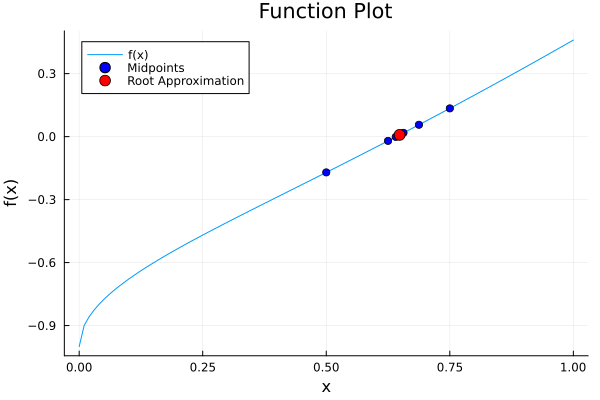

In [4]:
# Bisection method parameters
a = 0.0          # Start of the interval
b = 1.0          # End of the interval
tolerance = 10^-2 # Desired tolerance
max_iterations = 100  # Safety limit on iterations

# Call the bisection method with the function `f`
root_approximation, results = bisection_method(f, a, b, tolerance=tolerance, max_iterations=max_iterations)

# Additional plot of the function over the interval [a, b]
x_vals = range(a, b, length=100)
y_vals = f.(x_vals)
plot(x_vals, y_vals, label="f(x)", xlabel="x", ylabel="f(x)", title="Function Plot", legend=:topleft, grid=true)

# Mark the midpoint approximations on the function plot
scatter!(results.c, results.f_c, color=:blue, label="Midpoints", markersize=4)
scatter!([root_approximation], [f(root_approximation)], color=:red, label="Root Approximation", markersize=6)


 # Fixed Point Method

In [5]:
# Define the fixed-point iteration function with plotting
function fixed_point_iteration(g, x0; tol=1e-5, max_iter=100)
    x = x0
    iterations = []
    errors = []

    println(rpad("Iteration", 10), rpad("x_n", 20), rpad("|x_n - x_(n-1)|", 20))
    println("-"^50)
    
    for n in 1:max_iter
        x_new = g(x)
        error = abs(x_new - x)
        
        # Store the results for plotting
        push!(iterations, n)
        push!(errors, error)
        
        println(rpad(string(n), 10), rpad(string(x_new), 20), rpad(string(error), 20))
        
        # Check for convergence
        if error < tol
            println("Converged after $n iterations!")
            return x_new, n, true
        end
        
        # Update x for the next iteration
        x = x_new
    end

    println("Did not converge within the maximum number of iterations.")
    return x, max_iter, false
end




fixed_point_iteration (generic function with 1 method)

In [17]:
# Define the function g(x) for the fixed-point iteration
g(x) = (2 - exp(x) + x^2) / 3
# Initial guess
x0 = 0

# Run the fixed-point iteration
fixed_point_iteration(g, x0)

Iteration x_n                 |x_n - x_(n-1)|     
--------------------------------------------------
1         0.3333333333333333  0.3333333333333333  
2         0.23849956200834055 0.09483377132499277 
3         0.26251296366786586 0.024013401659525313
4         0.25623991092001425 0.006273052747851615
5         0.2578654070817873  0.0016254961617730435
6         0.25744331555362027 0.00042209152816702344
7         0.2575528599562193  0.00010954440259902665
8         0.2575244261304633  2.8433825756013498e-5
9         0.25753180626753985 7.38013707657359e-6 
Converged after 9 iterations!


(0.25753180626753985, 9, true)

 # More general Fixed Point Method

In [14]:
using DataFrames, Printf, Dates

# Define the functions g1, g2, g3, and g4
g1(x) = (3 + x - 2x^2)^(1/4)
g2(x) = ((x + 3 - x^4) / 2)^(1/2)
g3(x) = ((x + 3) / (x^2 + 2))^(1/2)
g4(x) = (3 * x^4 + 2 * x^2 + 3) / (4 * x^3 + 4 * x - 1)

# Function to perform fixed-point iteration with a specified tolerance and time tracking
function fixed_point_iteration(g, p0; tolerance=1e-9, max_iterations=1000)
    results = DataFrame(Iteration = Int[], p_n = Float64[], g_p_n = Float64[])
    p_n = p0
    iterations = 0
    converged = false

    # Start timing the iteration
    start_time = now()

    for n in 1:max_iterations
        g_p_n = g(p_n)
        push!(results, (n, p_n, g_p_n))

        println(@sprintf("Iteration %d: p_%d = %.12f, g(p_%d) = %.12f", n, n-1, p_n, n-1, g_p_n))

        # Check for convergence
        if abs(g_p_n - p_n) < tolerance
            converged = true
            break
        end

        p_n = g_p_n
        iterations += 1
    end

    # End timing
    elapsed_time = now() - start_time

    # Print convergence result
    if converged
        println("Converged after $iterations iterations.")
    else
        println("Did not converge within the maximum number of iterations.")
    end

    println(@sprintf("Final approximation: %.12f", p_n))
    println("Elapsed time: ", elapsed_time)

    return p_n, results, elapsed_time
end



fixed_point_iteration (generic function with 1 method)

In [15]:
# Initial guess
p0 = 1.0
tolerance = 1e-9
max_iterations = 100

# Run fixed-point iteration for each function and display results with timing
println("Fixed-point iterations for g1(x) = (3 + x - 2x^2)^(1/4)")
root_g1, results_g1, time_g1 = fixed_point_iteration(g1, p0, tolerance=tolerance, max_iterations=max_iterations)
println("\nResults for g1:")
println(results_g1)

println("\nFixed-point iterations for g2(x) = ((x + 3 - x^4) / 2)^(1/2)")
root_g2, results_g2, time_g2 = fixed_point_iteration(g2, p0, tolerance=tolerance, max_iterations=max_iterations)
println("\nResults for g2:")
println(results_g2)

println("\nFixed-point iterations for g3(x) = ((x + 3) / (x^2 + 2))^(1/2)")
root_g3, results_g3, time_g3 = fixed_point_iteration(g3, p0, tolerance=tolerance, max_iterations=max_iterations)
println("\nResults for g3:")
println(results_g3)

println("\nFixed-point iterations for g4(x) = (3x^4 + 2x^2 + 3) / (4x^3 + 4x - 1)")
root_g4, results_g4, time_g4 = fixed_point_iteration(g4, p0, tolerance=tolerance, max_iterations=max_iterations)
println("\nResults for g4:")
println(results_g4)

# Summary of times and final approximations
println("\nSummary of final approximations and elapsed times:")
println("g1 approximation: ", root_g1, ", Time: ", time_g1)
println("g2 approximation: ", root_g2, ", Time: ", time_g2)
println("g3 approximation: ", root_g3, ", Time: ", time_g3)
println("g4 approximation: ", root_g4, ", Time: ", time_g4)


Fixed-point iterations for g1(x) = (3 + x - 2x^2)^(1/4)
Iteration 1: p_0 = 1.000000000000, g(p_0) = 1.189207115003
Iteration 2: p_1 = 1.189207115003, g(p_1) = 1.080057752668
Iteration 3: p_2 = 1.080057752668, g(p_2) = 1.149671430589
Iteration 4: p_3 = 1.149671430589, g(p_3) = 1.107820529510
Iteration 5: p_4 = 1.107820529510, g(p_4) = 1.133932284505
Iteration 6: p_5 = 1.133932284505, g(p_5) = 1.118003117716
Iteration 7: p_6 = 1.118003117716, g(p_6) = 1.127857163488
Iteration 8: p_7 = 1.127857163488, g(p_7) = 1.121813166001
Iteration 9: p_8 = 1.121813166001, g(p_8) = 1.125539874245
Iteration 10: p_9 = 1.125539874245, g(p_9) = 1.123249432278
Iteration 11: p_10 = 1.123249432278, g(p_10) = 1.124659955364
Iteration 12: p_11 = 1.124659955364, g(p_11) = 1.123792378455
Iteration 13: p_12 = 1.123792378455, g(p_12) = 1.124326406402
Iteration 14: p_13 = 1.124326406402, g(p_13) = 1.123997843842
Iteration 15: p_14 = 1.123997843842, g(p_14) = 1.124200050957
Iteration 16: p_15 = 1.124200050957, g(p_15

# Newton's Method

In [1]:
using Printf, DataFrames, Plots, Dates

# Define Newton's method function
function newtons_method(f, f_prime, x0; tol=1e-5, max_iter=100)
    x_n = x0
    results = DataFrame(Iteration=Int[], a=Float64[], b=Float64[], c=Float64[], f_c=Float64[])
    a = x_n - 1  # Arbitrary interval start for display
    b = x_n + 1  # Arbitrary interval end for display
    iter_values = []  # Array to store each approximation for plotting

    println("Starting Newton's Method...")
    start_time = now()
    for i in 1:max_iter
        f_xn = f(x_n)
        f_prime_xn = f_prime(x_n)

        # Update for Newton's formula
        x_next = x_n - f_xn / f_prime_xn
        c = x_next
        push!(results, (i, a, b, c, f(c)))
        
        # Print iteration details
        println(@sprintf("Iteration %d: a = %.4f, b = %.4f, c = %.4f, f(c) = %.12f", i, a, b, c, f(c)))
        
        # Append the current c to iter_values for plotting
        push!(iter_values, c)
        
        # Check for convergence
        if abs(x_next - x_n) < tol
            elapsed_time = now() - start_time
            println("\nElapsed Time: $(Dates.value(elapsed_time)/1e3) seconds")
            println("Final Root Approximation: $(c)")
            println("Total Iterations: $i")
            println("\nDetailed results for each iteration:")
            display(results)
            plot(iter_values, marker=:o, label="Root Approximation", xlabel="Iteration", ylabel="x_n")
            return c
        end

        # Update x_n and arbitrary bounds
        a = min(x_n, x_next)
        b = max(x_n, x_next)
        x_n = x_next
    end

    # If max_iter reached without convergence
    println("Did not converge within $max_iter iterations.")
    return nothing
end


newtons_method (generic function with 1 method)

In [2]:

# Main execution block to prompt for user inputs and run the method
function main()
    # Prompt user for initial guess
    println("Enter initial guess x0:")
    x0 = parse(Float64, readline())

    # Define the function and its derivative
    #f(x) = exp(x) + 2^(-x) + 2 * cos(x) - 6  # Change this function as needed
    #f_prime(x) = exp(x) - 2^(-x) * log(2) - 2 * sin(x)  # Change this derivative as needed


    f(x) = log(x - 1) + cos(x - 1)
    f_prime(x) = 1 / (x - 1) - sin(x - 1)
    
    # Call Newton's method with user input function, derivative, and initial guess
    newtons_method(f, f_prime, x0)
end

# Run the main function
main()


Enter initial guess x0:


stdin>  1.5


Starting Newton's Method...
Iteration 1: a = 0.5000, b = 2.5000, c = 1.3787, f(c) = -0.041849513156
Iteration 2: a = 1.3787, b = 1.5000, c = 1.3971, f(c) = -0.001304376496
Iteration 3: a = 1.3787, b = 1.3971, c = 1.3977, f(c) = -0.000001358963
Iteration 4: a = 1.3971, b = 1.3977, c = 1.3977, f(c) = -0.000000000001

Elapsed Time: 0.674 seconds
Final Root Approximation: 1.3977484759580519
Total Iterations: 4

Detailed results for each iteration:


,Iteration,a,b,c,f_c
,Int64,Float64,Float64,Float64,Float64
1,1,0.5,2.5,1.37871,-0.0418495
2,2,1.37871,1.5,1.39714,-0.00130438
3,3,1.37871,1.39714,1.39775,-1.35896e-6
4,4,1.39714,1.39775,1.39775,-1.47837e-12


1.3977484759580519

# Homework 2.6 4-6

#  Implementing Newton’s Method Using Horner’s Method

In [3]:
# Horner's Method to evaluate polynomial and its derivative
function horner_method(coeffs, x)
    n = length(coeffs) - 1
    p_val = coeffs[1]  # Start with the leading coefficient
    p_prime_val = 0.0  # Start derivative value

    for i in 2:length(coeffs)
        p_prime_val = p_prime_val * x + p_val  # Derivative update
        p_val = p_val * x + coeffs[i]  # Polynomial update
    end

    return p_val, p_prime_val
end

# Newton's Method using Horner's Method
function newton_method(coeffs, x0; tol=1e-8, max_iter=100)
    x = x0
    for iter in 1:max_iter
        p_val, p_prime_val = horner_method(coeffs, x)
        
        if abs(p_val) < tol
            println("Converged to root: $x after $iter iterations.")
            return x
        end
        
        x -= p_val / p_prime_val
    end
    println("Did not converge within $max_iter iterations.")
    return x
end


newton_method (generic function with 1 method)

# Applying the Function to Find the Root of a Polynomial

In [4]:
# Define polynomial coefficients for P(x) = x^5 - x^4 + 2x^3 - 3x^2 + x - 4
coeffs = [1, -1, 2, -3, 1, -4]

# Initial guess
x0 = 1.5

# Call Newton's method
root = newton_method(coeffs, x0)
println("Root found: $root")


Converged to root: 1.4981899847626807 after 3 iterations.
Root found: 1.4981899847626807


# Find Critical Points of a Polynomial

To find critical points of 
$$ Q(x) = x^4 + 2x^3 - 3x^2 + x - 4 $$ 
we find roots of 
$$ Q'(x) = 4x^3 + 6x^2 - 6x + 1 $$

Define Derivative Polynomial Coefficients for 
$$ Q'(x) = 4x^3 + 6x^2 - 6x + 1 $$:

```julia
    
q_prime_coeffs = 4, 6, -6, 1


In [9]:
q_prime_coeffs = [4, 6, -6, 1]

# Initial Guess
x0 = 1.0
critical_point = newton_method(q_prime_coeffs, x0)
println("Critical point found: $critical_point")


Converged to root: 0.500000000026739 after 7 iterations.
Critical point found: 0.500000000026739
